# Blackjack Simulator

### Game Helper Functions

In [260]:
import random

def check_ace(hand): 
    """
    Checks if there's an ace in the hand in case total went over 21
    """
    if 'A' in hand:
        hand[hand.index('A')] = 'A.'
        return True
    else:
        return False
    

def hand_total(hand): 
    """
    Calculates sum total values from a list of strings using a dictionary
    """
    d_val = {'2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7, '8': 8, 
             '9': 9, '10': 10, 'J': 10, 'Q': 10, 'K': 10, 'A': 11, 'A.': 1}
    return int(sum(d_val[i] for i in hand))


def deal_card(hand, deck, num_of_cards=1): 
    """
    Deals a card, defaulted to one card
    """
    for _ in range(num_of_cards):
        hand.append(deck.pop())
    return hand


def create_deck(num_of_decks=1): 
    """
    Creates a standard playing card deck, defaulted to one deck
    """
    deck = ['2','3','4','5','6','7','8','9','10','J','Q','K','A']*4*num_of_decks
    random.shuffle(deck)
    return deck
    

def play_again():
    """
    Loops the game
    """
    while True: # Asking the player to play again or not
        ans = input("Play again? \n").lower()
        if ans == 'yes' or ans == 'y':
            return True
        elif ans == 'no' or ans == 'n':
            return False
        else:
            print("Yes or no? ")
            continue
            

#### Player Turn Function

In [261]:
def player_move(your_hand, limit, true_cnt, dealer_hand):
    """
    Chooses 'hit' or 'stay' depending on the limit set and count
    """
    
    dtotal = hand_total(dealer_hand[:1])

    # Meaning there are plenty of face cards left
    if true_cnt > 0:
        if hand_total(your_hand) >= limit:
            return 'stay'
        elif hand_total(your_hand) < limit:
            return 'hit'
        elif dtotal >= 10:
            return 'stay'
        
        
    # Meaning there are plenty of low cards left: < 6 value
    elif true_cnt < 0:
        if hand_total(your_hand) <= limit:
            return 'hit'
        elif hand_total(your_hand) > limit:
            return 'stay'
        elif dtotal < 10:
            return 'hit'
        
        
    # Meaning the count is neutral so play a basic strategy    
    else:
        if hand_total(your_hand) >= 17:
            return 'stay'
        elif hand_total(your_hand) < 17:
            return 'hit'
        

#### Dealer Turn Function

In [262]:
def dealer_turn(your_hand, dealer_hand, total, dtotal, deck, r_count, true_cnt, strategy, turn=True): 
    """
    Activates the dealer's turn if player's move was 'stay'
    """
    # Tallying wins, losses, and draws
    wins = 0
    draw = 0
    loss = 0
    high_wins = 0
    neutral_wins = 0
    low_wins = 0
    
    # Looping through the moves
    while turn:
        total  = hand_total(your_hand)
        if total > 21: 
            
            # Evaluating a player's hand to see if they have an ace
            check_ace(your_hand)
            total = hand_total(your_hand)
            continue
            
        dtotal = hand_total(dealer_hand)

        # Dealing cards to the dealer if they have less than or equal to 16
        while dtotal <= 16: 
            deal_card(dealer_hand, deck)
            dtotal = hand_total(dealer_hand)
            
            # Counter
            r_count += card_counter(dealer_hand[-1:], strategy)
            true_cnt = true_counter(deck, r_count)
            
        # Checking if the dealer wins
        if dtotal == 21: 
            loss += 1
            break

        # Checking if the dealer busts
        elif dtotal > 21: 
            if check_ace(dealer_hand):
                continue
            else:
                wins += 1
                if total < 10:
                    low_wins += 1
                elif total >= 10 & total < 17:
                    neutral_wins += 1
                elif total >= 17:
                    high_wins += 1
                break
                
        # Comparing dealer hand to player hand
        elif 17 <= dtotal <= 21: 
            if dtotal > total:
                loss += 1
                break
            elif dtotal < total:
                wins += 1
                break
            elif dtotal == total:
                draw += 1
                break
            else:
                wins += 1
                break
    return [wins, loss, draw, r_count, true_cnt]

### Card Counter - Create strat matrix

In [263]:
import pandas as pd

# Creating a simple dictionary to start the values
vals = {'2': 1, '3': 1, '4': 1, '5': 1, '6': 1, 
            '7': 0, '8': 0, '9': 0, '10': -1, 'J': -1, 
            'Q': -1, 'K': -1, 'A': -1, 'A.': -1}

# Converting to a DataFrame
df = pd.DataFrame(vals, index=[0])

# Adding in values to each row in the DF
df.loc[len(df), :] = [0,1,1,1,1,0,0,0,-1,-1,-1,-1,0,0]
df.loc[len(df), :] = [1,1,2,2,1,1,0,0,-2,-2,-2,-2,0,0]
df.loc[len(df), :] = [1,1,1,1,1,1,0,0,-1,-1,-1,-1,-1,-1]
df.loc[len(df), :] = [1,1,2,2,2,1,0,-1,-2,-2,-2,-2,0,0]
df.loc[len(df), :] = [1,1,1,1,1,0,0,0,-1,-1,-1,-1,-1,-1]
df.loc[len(df), :] = [.5,1,1,1.5,1,.5,0,-.5,-1,-1,-1,-1,-1,-1]
df.loc[len(df), :] = [1,1,2,2,2,1,0,0,-2,-2,-2,-2,-1,-1]
df.loc[len(df), :] = [0,0,0,0,0,0,0,0,0,0,0,0,0,0]

# Renaming the index for each row
df.rename({0: 'Hi-Lo',
           1: 'Hi-Opt I',
           2: 'Hi-Opt II',
           3: 'KO',
           4: 'Omega II',
           5: 'Red 7',
           6: 'Halves',
           7: 'Zen Count',
           8: 'No Strategy'}, inplace=True)

#### Dataframe Preview

In [264]:
df

,2,3,4,5,6,7,8,9,10,J,Q,K,A,A.
Hi-Lo,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
Hi-Opt I,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0
Hi-Opt II,1.0,1.0,2.0,2.0,1.0,1.0,0.0,0.0,-2.0,-2.0,-2.0,-2.0,0.0,0.0
KO,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
Omega II,1.0,1.0,2.0,2.0,2.0,1.0,0.0,-1.0,-2.0,-2.0,-2.0,-2.0,0.0,0.0
Red 7,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
Halves,0.5,1.0,1.0,1.5,1.0,0.5,0.0,-0.5,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
Zen Count,1.0,1.0,2.0,2.0,2.0,1.0,0.0,0.0,-2.0,-2.0,-2.0,-2.0,-1.0,-1.0
No Strategy,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Save DF as pickle

In [265]:
df.to_pickle('Card_Counting_Values')

### Card Counter Functions

In [266]:
import pandas as pd
df = pd.read_pickle('Card_Counting_Values')

def card_counter(hand, strategy='Hi-Lo'):
    """
    Counting cards based on strategy selected
    Returns sum of the values
    """
    return sum(list(map(lambda i: df.loc[strategy][i].item(), hand)))

def true_counter(deck, r_count):
    """
    Calculates and returns the true count rounded down
    """
    try:
        return round(r_count/(len(deck)//52))
    except:
        # Compensating for when there is less than 52 cards or 1 deck left
        return r_count

### Main Blackjack Loop

In [267]:
def blackjack(deck, limit, r_count, true_cnt, strategy):
    """
    Playing Blackjack
    """
    your_hand   = deal_card([], deck, 2)
    dealer_hand = deal_card([], deck, 2)
    
    # Tallying wins, losses, and draws
    wins = 0
    draw = 0
    loss = 0
    high_wins = 0
    neutral_wins = 0
    low_wins = 0
    
    # Card Counting
    r_count  += card_counter(your_hand, strategy) + card_counter(dealer_hand[:1], strategy)
    true_cnt  = true_counter(deck, r_count)
    
    # Looping through the moves
    while len(deck) > 1:
        
        # Checking if the player has a natural blackjack
        if hand_total(your_hand) == 21 and hand_total(dealer_hand) < 21:
            
            # Card Counting
            r_count  += card_counter(dealer_hand[-1:], strategy)
            true_cnt  = true_counter(deck, r_count)
            
            wins += 1
            # if hand_total(your_hand) < 10:
            #     low_wins += 1
            # elif hand_total(your_hand) >= 10 & hand_total(your_hand) < 17:
            #     neutral_wins += 1
            # elif hand_total(your_hand) >= 17:
            #     high_wins += 1
            break
        
        # Checking if the player and the dealer tie if they both have natural blackjacks
        elif hand_total(your_hand) == 21 and hand_total(dealer_hand) == 21:
            
            # Counter
            r_count += card_counter(dealer_hand[-1:], strategy)
            true_cnt = true_counter(deck, r_count)
            
            draw += 1
            # if hand_total(your_hand) < 10:
            #     low_wins += 1
            # elif hand_total(your_hand) >= 10 & hand_total(your_hand) < 17:
            #     neutral_wins += 1
            # elif hand_total(your_hand) >= 17:
            #     high_wins += 1
            break
        
        # Allowing the player to make a move
        move = player_move(your_hand, limit, true_cnt, dealer_hand)
        
        if move == "hit":
            prev_total = hand_total(your_hand)
            deal_card(your_hand, deck)
            total = hand_total(your_hand)
            
            # Counter
            r_count += card_counter(your_hand[-1:], strategy)
            true_cnt = true_counter(deck, r_count)
            
            # Checking if the player busts
            if  total > 21:              
                # Checking for an ace in the player hand
                if check_ace(your_hand): 
                    total = hand_total(your_hand)
                    continue
                # Otherwise they bust
                else:                    
                    loss += 1
                    break
            elif total < 21:             
                # Going back to asking the player for a move
                continue
            # Checking if the player succeeded in achieving blackjack
            elif total == 21:            
                wins += 1
            if prev_total < 10:
                low_wins += 1
            elif prev_total >= 10 & prev_total < 17:
                neutral_wins += 1
            elif prev_total >= 17:
                high_wins += 1
                break
        elif move == "stay":
            total  = hand_total(your_hand)
            dtotal = hand_total(dealer_hand)
            
            # Counter
            r_count += card_counter(dealer_hand[-1:], strategy)
            true_cnt = true_counter(deck, r_count)
            
            # Running the function for the dealer's turn
            result = dealer_turn(your_hand, dealer_hand, total, dtotal, deck, r_count, true_cnt, strategy)
            
            # The results of the dealer's turn
            wins += result[0]
            loss += result[1]
            draw += result[2]
            
            # Counter 
            r_count  = result[3]
            true_cnt = result[4]
            break
            
    # Returning the results of the game
    return [wins, loss, draw, r_count, true_cnt, high_wins, neutral_wins, low_wins]

### Play Blackjack

In [268]:
def play_blackjack(limit, strategy):
    """
    Looping the game until no cards left
    """
    deck = create_deck(6)
    
    wins = []
    draw = []
    loss = []
    high_wins = []
    neutral_wins = []
    low_wins = []
    rounds_played = 0
    
    r_count = 0
    true_cnt = 0
        
    while True:
        
        # Running blackjack
        game = blackjack(deck, limit, r_count, true_cnt, strategy)
        
        # Recording the results: wins, loss, draw, counts
        wins.append(game[0])
        loss.append(game[1])
        draw.append(game[2])
        high_wins.append(game[5])
        neutral_wins.append(game[6])
        low_wins.append(game[7])
        rounds_played += 1
        
        r_count = game[3]
        true_cnt = game[4]
                        
        # Determining if there are enough cards left
        if len(deck) < 12:
            break
    return [wins, draw, loss, rounds_played, high_wins, neutral_wins, low_wins]

### Simulate games

In [269]:
# Declaring variables for use
results      = {}
high_hand_winrate = {}
neutral_hand_winrate = {}
low_hand_winrate = {}
draw_rate = {}
win_rate = {}
only_win = 0
total_games  = 0
draws = 0
games_sim    = 100
rec_rounds   = 10
limit        = 16
strategies   = list(df.index)
strategies.append(df.index[0])
#random.shuffle(strategies) # shuffling the index for more randomization


# Looping through the various strategies we have
for strat in strategies:
    print(f"Simulating {strat}")
    
    results[f"{strat}"] = []    
    high_hand_winrate[f"{strat}"] = []    
    neutral_hand_winrate[f"{strat}"] = []    
    low_hand_winrate[f"{strat}"] = []
    draw_rate[f"{strat}"] = []
    win_rate[f"{strat}"] = []
    high_wins = 0    
    neutral_wins = 0
    low_wins = 0
    
    c = games_sim
    
    # Simulating the games with a specific strategy
    for _ in range(games_sim):
        bj = play_blackjack(limit, strat)

        # Recording only the last N rounds played in order to 
        # account for the effectiveness of the card counting technique
        last_wins    = sum(bj[0][-rec_rounds:])
        last_draws   = sum(bj[1][-rec_rounds:])
        draws   += sum(bj[1][-rec_rounds:])
        high_wins   += sum(bj[4][-rec_rounds:])
        neutral_wins   += sum(bj[5][-rec_rounds:])
        low_wins   += sum(bj[6][-rec_rounds:])
        only_win += last_wins
        total_games += rec_rounds

        #wp = round((winnings/total_games)*100, 2)
        
        owp = (only_win/total_games)*100
        dp = (draws/total_games)*100
        wp = owp + dp
        results[f"{strat}"].append(round(wp, 3))
        draw_rate[f"{strat}"].append(round(dp, 3))
        win_rate[f"{strat}"].append(round(owp, 3))
        neutral_hand_winrate[f"{strat}"].append(round((neutral_wins), 3))

        c -= 1
        print(c, end=" ")
                
    print(f"\nCompleted {strat}\n")
    
    if strat == strategies[-1]:
        print(f"SIMULATED ALL STRATEGIES {games_sim} TIMES EACH")
        
        
games_sim = list(range(games_sim))

Simulating Hi-Lo
99 98 97 96 95 94 93 92 91 90 89 88 87 86 85 84 83 82 81 80 79 78 77 76 75 74 73 72 71 70 69 68 67 66 65 64 63 62 61 60 59 58 57 56 55 54 53 52 51 50 49 48 47 46 45 44 43 42 41 40 39 38 37 36 35 34 33 32 31 30 29 28 27 26 25 24 23 22 21 20 19 18 17 16 15 14 13 12 11 10 9 8 7 6 5 4 3 2 1 0 
Completed Hi-Lo

SIMULATED ALL STRATEGIES 100 TIMES EACH
Simulating Hi-Opt I
99 98 97 96 95 94 93 92 91 90 89 88 87 86 85 84 83 82 81 80 79 78 77 76 75 74 73 72 71 70 69 68 67 66 65 64 63 62 61 60 59 58 57 56 55 54 53 52 51 50 49 48 47 46 45 44 43 42 41 40 39 38 37 36 35 34 33 32 31 30 29 28 27 26 25 24 23 22 21 20 19 18 17 16 15 14 13 12 11 10 9 8 7 6 5 4 3 2 1 0 
Completed Hi-Opt I

Simulating Hi-Opt II
99 98 97 96 95 94 93 92 91 90 89 88 87 86 85 84 83 82 81 80 79 78 77 76 75 74 73 72 71 70 69 68 67 66 65 64 63 62 61 60 59 58 57 56 55 54 53 52 51 50 49 48 47 46 45 44 43 42 41 40 39 38 37 36 35 34 33 32 31 30 29 28 27 26 25 24 23 22 21 20 19 18 17 16 15 14 13 12 11 10 9 8 7 6 5 4 3

### Graphing Results

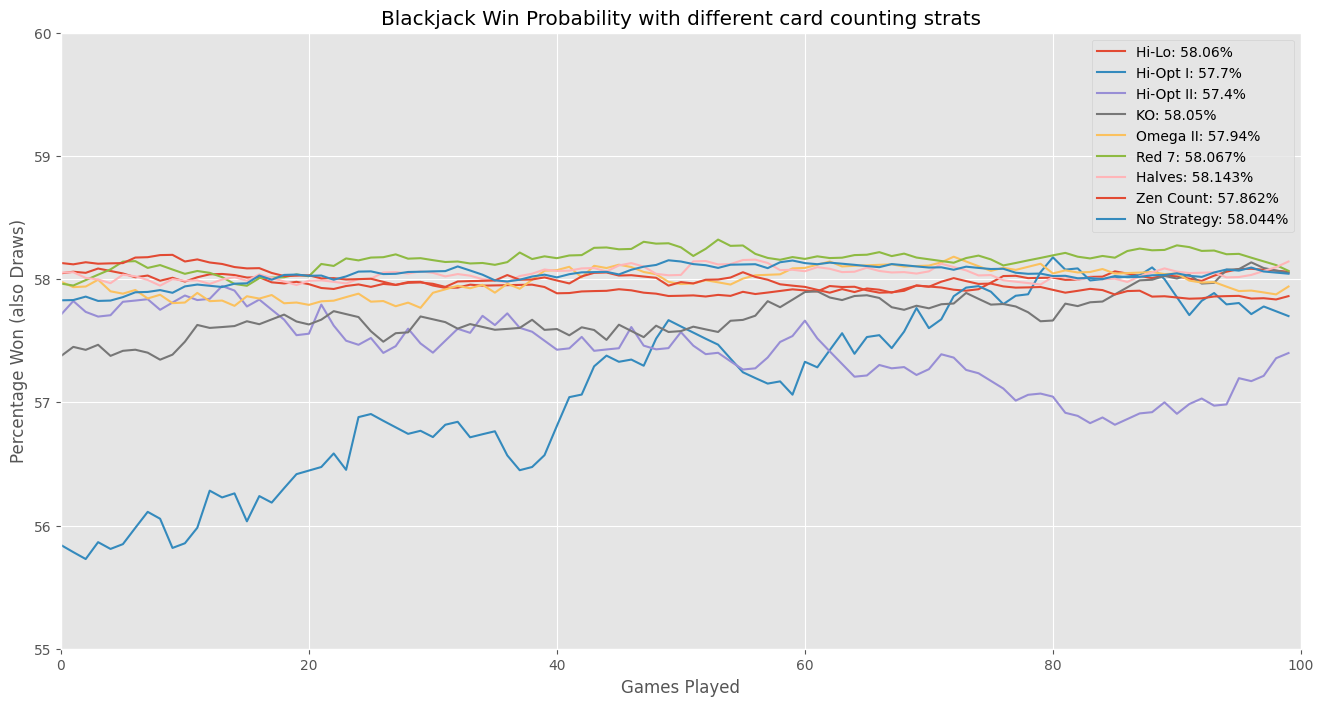

In [270]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.figure(figsize=(16,8))

# Sort results
ival = 0

# Plotting each strategies result
for i in results:
    plt.plot(games_sim, results[i], label=i+': '+str(results[i][-1])+'%')
    
plt.title("Blackjack Win Probability with different card counting strats")
plt.ylabel("Percentage Won (also Draws)")
plt.xlabel("Games Played")
plt.ylim([55,60])
plt.xlim([0,len(games_sim)])
plt.legend()
#plt.savefig("Blackjack_Analysis.png")
plt.show()

### Data Analysis

#### Average Winrate

In [271]:
def get_avg_winrate(strategy="No Strategy"):
    total_winrate = 0
    for k in results[strategy]:
        total_winrate += k
    avg = total_winrate/len(results[i])
    return round(avg, 2)

def get_avg_drawrate(strategy="No Strategy"):
    total_drawrate = 0
    for k in draw_rate[strategy]:
        total_drawrate += k
    avg = total_drawrate/len(draw_rate[i])
    return round(avg, 2)

def get_avg_only_winrate(strategy="No Strategy"):
    total_drawrate = 0
    for k in win_rate[strategy]:
        total_drawrate += k
    avg = total_drawrate/len(win_rate[i])
    return round(avg, 2)

def get_avg_neutralrate(strategy="No Strategy"):
    total_winrate = 0
    for k in neutral_hand_winrate[strategy]:
        total_winrate += k
    avg = total_winrate/len(neutral_hand_winrate[i])
    return round(avg, 2)

def get_all_avg_winrate():
    total_winrate = 0
    avg_winrate = []
    for i in results:
        for k in results[i]:
            total_winrate += k
            avg = total_winrate/len(results[i])
        avg_winrate.append(round(avg, 2))
        avg = 0
        total_winrate = 0
    return avg_winrate

def get_all_avg_drawrate():
    total_drawrate = 0
    avg_drawrate = []
    for i in draw_rate:
        for k in draw_rate[i]:
            total_drawrate += k
            avg = total_drawrate/len(draw_rate[i])
        avg_drawrate.append(round(avg, 2))
        avg = 0
        total_drawrate = 0
    return avg_drawrate

def get_all_avg_only_winrate():
    total_winrate = 0
    avg_winrate = []
    for i in win_rate:
        for k in win_rate[i]:
            total_winrate += k
            avg = total_winrate/len(win_rate[i])
        avg_winrate.append(round(avg, 2))
        avg = 0
        total_winrate = 0
    return avg_winrate

    
    

print(get_avg_winrate("Hi-Lo"))
print(get_all_avg_winrate())
print(get_avg_drawrate("Hi-Lo"))
print(get_all_avg_drawrate())
print(get_all_avg_only_winrate())

57.97
[57.97, 57.12, 57.41, 57.71, 57.98, 58.16, 58.04, 57.98, 58.04]
9.29
[9.29, 9.24, 9.38, 9.39, 9.1, 9.24, 9.2, 9.28, 9.28]
[48.68, 47.88, 48.04, 48.32, 48.88, 48.92, 48.84, 48.71, 48.76]


#### Order avg winrate

In [272]:
from collections import OrderedDict
import numpy as np
import pandas as pd
def sort_winrates():
    awrs = {}
    for i in strategies:
        
        awrs[f"{i}"] = (get_avg_winrate(i))

    # Sort the winrates in ascending order
    keys = list(awrs.keys())
    values = list(awrs.values())
    sorted_value_index = np.argsort(values, kind="quicksort")
    sorted_dict = {keys[i]: values[i] for i in sorted_value_index}
    return(sorted_dict)

def sort_only_winrates():
    awrs = {}
    owrs = sort_winrates()
    item = {}

    for i in strategies:
        
        awrs[f"{i}"] = (get_avg_only_winrate(i))

    # Sort the winrates in ascending order
    keys = list(awrs.keys())
    values = list(awrs.values())
    for key, values in owrs.items():
        item[f"{key}"] = (awrs[f"{key}"])
    return(item)

def sort_only_drawrates():
    awrs = {}
    owrs = sort_winrates()
    item = {}

    for i in strategies:
        
        awrs[f"{i}"] = (get_avg_drawrate(i))

    # Sort the winrates in ascending order
    keys = list(awrs.keys())
    values = list(awrs.values())
    for key, values in owrs.items():
        item[f"{key}"] = (awrs[f"{key}"])
    return(item)

def sort_neutralrates():
    awrs = {}
    owrs = sort_winrates()
    item = {}

    for i in strategies:
        
        awrs[f"{i}"] = (get_avg_neutralrate(i))

    # Sort the winrates in ascending order
    keys = list(awrs.keys())
    values = list(awrs.values())
    for key, values in owrs.items():
        item[f"{key}"] = (awrs[f"{key}"])
    return(item)


#### Winrate based on hand

In [273]:
def get_strat_high_winrate(strategy="No Strategy"):
    total_winrate = 0
    avg_winrate = []
    for k in high_hand_winrate[strategy]:
        total_winrate += k
    avg = total_winrate/len(results[i])
    avg_winrate.append(avg)
    return round(avg, 2)

def get_high_hand_winrate():
    hwr = {}
    for g in strategies:
        hwr[f"{g}"] = get_strat_high_winrate(g)
        keys = list(hwr.keys())
        values = list(hwr.values())
        sorted_dict = {keys[g]: values[g] for g in values}

    return(sorted_dict)

print(high_hand_winrate, neutral_hand_winrate, low_hand_winrate)


{'Hi-Lo': [], 'Hi-Opt I': [], 'Hi-Opt II': [], 'KO': [], 'Omega II': [], 'Red 7': [], 'Halves': [], 'Zen Count': [], 'No Strategy': []} {'Hi-Lo': [1, 2, 2, 3, 3, 3, 3, 4, 4, 5, 5, 6, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 10, 11, 11, 12, 12, 12, 12, 12, 13, 13, 14, 14, 15, 16, 17, 18, 18, 18, 18, 19, 20, 20, 22, 22, 22, 22, 22, 22, 23, 23, 24, 25, 27, 27, 28, 28, 29, 30, 30, 33, 34, 34, 34, 35, 36, 37, 39, 40, 40, 40, 40, 40, 42, 45, 45, 45, 45, 45, 46, 46, 47, 48, 50, 51, 51, 51, 51, 51, 51, 51, 53, 54, 56, 56, 56, 57, 57], 'Hi-Opt I': [1, 2, 2, 2, 2, 3, 4, 4, 4, 4, 5, 5, 8, 8, 8, 8, 9, 9, 10, 12, 12, 12, 14, 14, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 17, 19, 19, 19, 19, 20, 21, 22, 23, 24, 25, 25, 26, 26, 27, 29, 29, 29, 29, 30, 30, 30, 31, 31, 33, 33, 35, 35, 37, 39, 39, 41, 41, 41, 42, 43, 43, 44, 47, 49, 50, 52, 52, 53, 53, 53, 54, 54, 54, 54, 54, 54, 56, 56, 56, 56, 56, 57, 59, 61, 62, 63, 63, 63, 63, 65], 'Hi-Opt II': [0, 3, 3, 3, 4, 6, 6, 6, 7, 9, 10, 12, 13, 14, 14, 14, 14, 14, 15,

### Run Analysis

In [274]:
#test sort
def get_avg_winrates_dataframe():
    df_avg_winrate = pd.DataFrame(sort_winrates(), index=[0])
    df_avg_winrate.loc[len(df_avg_winrate), :] = sort_only_winrates()
    df_avg_winrate.loc[len(df_avg_winrate), :] = sort_only_drawrates()
    df_avg_winrate.loc[len(df_avg_winrate), :] = sort_neutralrates()
    df_avg_winrate.rename({0: 'Avg Total Winrate%',
                           2: 'Avg Drawrate%',
                           1: 'Avg Winrate%',
                           3: 'Avg Neutral Hand Winrate%'
                           }, inplace=True)
    
    return df_avg_winrate

get_avg_winrates_dataframe()

,Hi-Opt I,Hi-Opt II,KO,Hi-Lo,Omega II,Zen Count,Halves,No Strategy,Red 7
Avg Total Winrate%,57.12,57.41,57.71,57.97,57.98,57.98,58.04,58.04,58.16
Avg Winrate%,47.88,48.04,48.32,48.68,48.88,48.71,48.84,48.76,48.92
Avg Drawrate%,9.24,9.38,9.39,9.29,9.10,9.28,9.20,9.28,9.24
Avg Neutral Hand Winrate%,30.32,32.81,35.66,26.08,30.49,32.10,33.58,35.94,30.75
